In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import date as dt
from datetime import datetime
from datetime import timedelta

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

import tqdm
import tensorflow_addons as tfa
from keras_tqdm import TQDMNotebookCallback
from tqdm.keras import TqdmCallback

df = pd.read_csv('Datasets/covid_19_india.csv')
df1 = df

df.head()

Using TensorFlow backend.


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [2]:
tqdm.__version__

'4.45.0'

In [3]:
df['Date']
#df['Date'] = pd.to_datetime(df.Date)

D=[]
for item in df['Date']:
    day = item[0]+item[1]
    month = item[3] + item[4]
    year = item[6] + item[7]
    xx = day + '-' + month + '-' + year
    xx = datetime.strptime(xx, '%d-%m-%y') 
    D.append(xx)

#Making a List of Dates such that they are understandable

df['Date'] = D



df


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043


In [4]:
df['Day'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
#Subtracting The Dates and converting them to Day1,Day2,Day3....

df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1.0
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2.0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3.0
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4.0
...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004,89.0
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2,89.0
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51,89.0
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043,89.0


In [5]:
df1['Active'] = df1['Confirmed'] - df1['Deaths'] - df1['Cured']

df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Active
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1.0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2.0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3.0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004,89.0,657
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2,89.0,0
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51,89.0,18
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043,89.0,1612


# Active cases trend of each state:

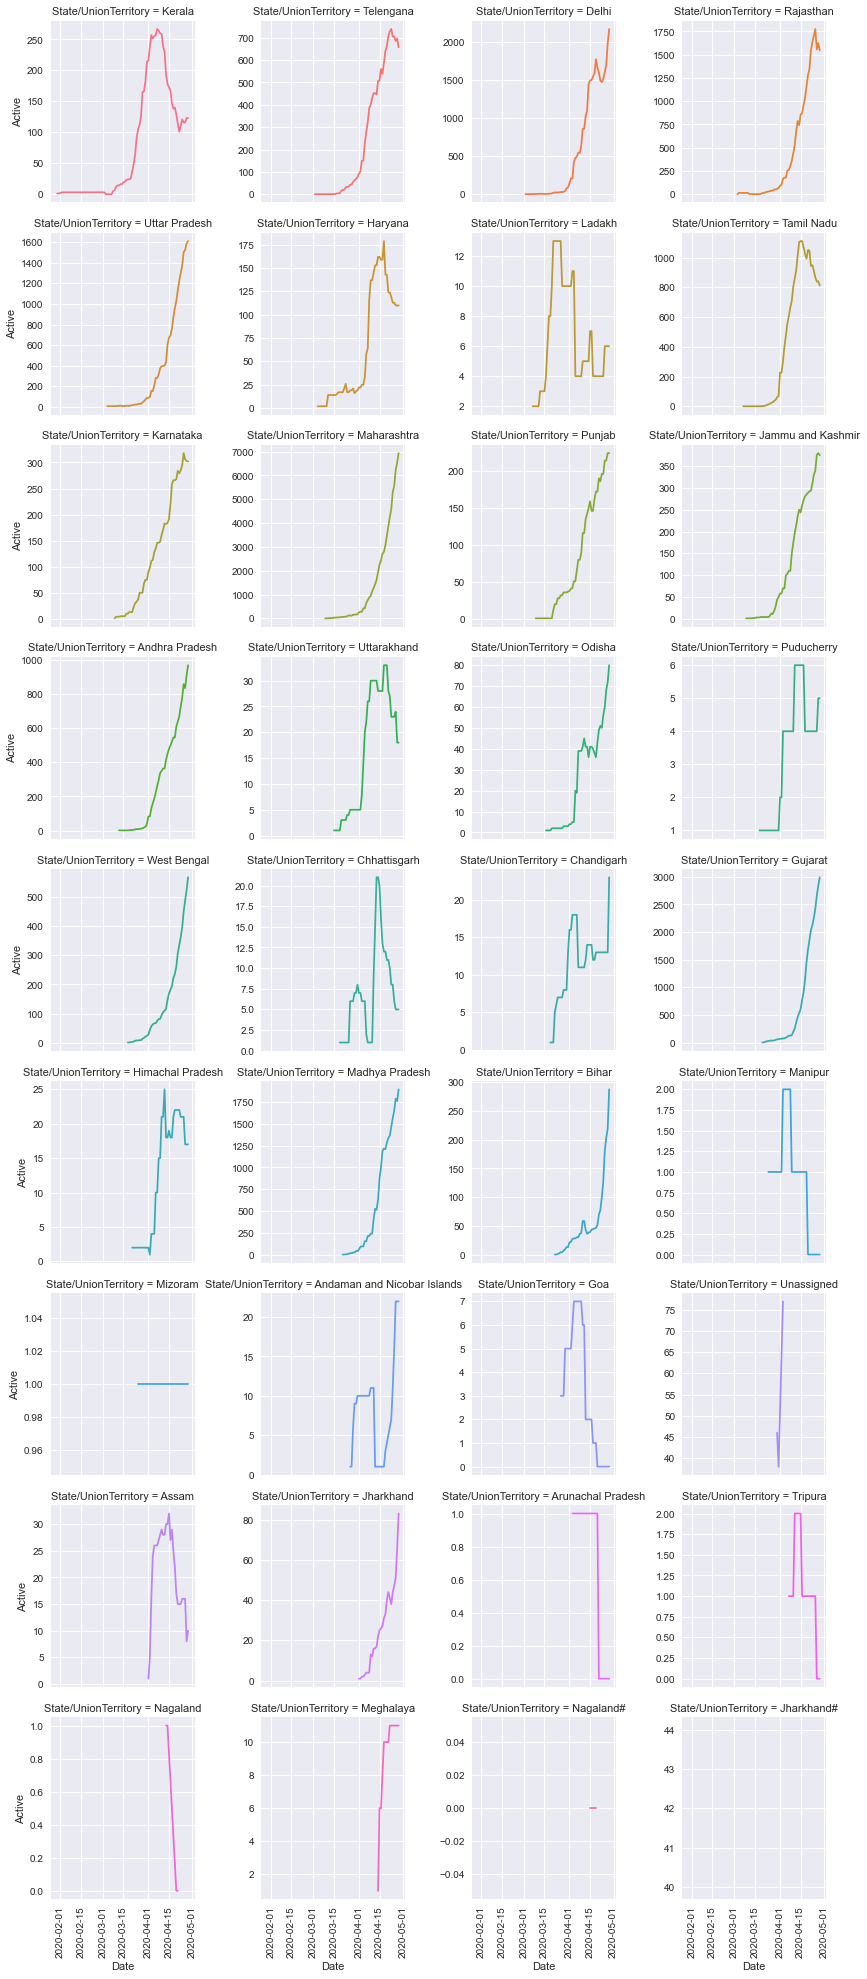

In [6]:
plt.style.use('seaborn')
g = sns.FacetGrid(df1, col="State/UnionTerritory", hue="State/UnionTerritory", 
                  sharey=False, col_wrap=4)
g = g.map(plt.plot, "Date", "Active")
g.set_xticklabels(rotation=90)
plt.show()

In [7]:
df = df.sort_values(by=['Day'])
df.drop(df.iloc[:, 0:8], inplace = True, axis = 1)
#df.drop(['time_delta'], inplace = True, axis = 1)
df = df.groupby(['Day'],as_index=False).sum()

#Summing up the confirmed cases for each day

df

,Day,Confirmed,Active
0,0.0,1,1
1,1.0,1,1
2,2.0,2,2
3,3.0,3,3
4,4.0,3,3
...,...,...,...
85,85.0,23452,17915
86,86.0,24893,18904
87,87.0,26605,19865
88,88.0,28160,20912


In [8]:
#Processing the data to be fed into the model

X = df['Day']
y = df['Confirmed']


X=np.array(X,dtype='float')
y = np.array(y,dtype='int')


X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

#Test & Train split

In [10]:
model = Sequential()
model.add(Dense(500, input_dim=1, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [11]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
print('>>> Training Started...1.5 mins to go..')
model.fit(X_train,y_train,epochs=5000, verbose=0)
#callbacks=[TQDMNotebookCallback()] for TQDM Progress

>>> Training Started...1.5 mins to go..


# Prediction of COVID19 cases using available data:
Available Data: Confirmed cases from 30/1/20 to 28/4/20
<br>
The data is split into 30/1/20 to 1/4/20 as known Data and Predict the cases from 2/4/20 to 28/4/20. 

In [12]:
#Predicting the model using test data

predict=model.predict(X_test)

print(X_test.flatten())
print('*****************************************************')    
print(predict.flatten())
print('*****************************************************')
print(y_test.flatten())

[63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.
 81. 82. 83. 84. 85. 86. 87. 88. 89.]
*****************************************************
[ 1902.6002  2466.8562  3251.129   4117.666   5005.901   5897.768
  6804.3623  7742.1533  8701.322   9664.923  10646.608  11644.797
 12650.044  13658.967  14677.395  15696.034  16714.766  17733.494
 18752.225  19770.955  20789.691  21808.445  22827.254  23846.074
 24864.898  25883.719  26902.54  ]
*****************************************************
[ 2069  2547  3072  3577  4281  4789  5274  5865  6761  7529  8447  9352
 10815 11933 12759 13835 14792 16116 17656 18985 20471 21700 23452 24893
 26605 28160 29834]


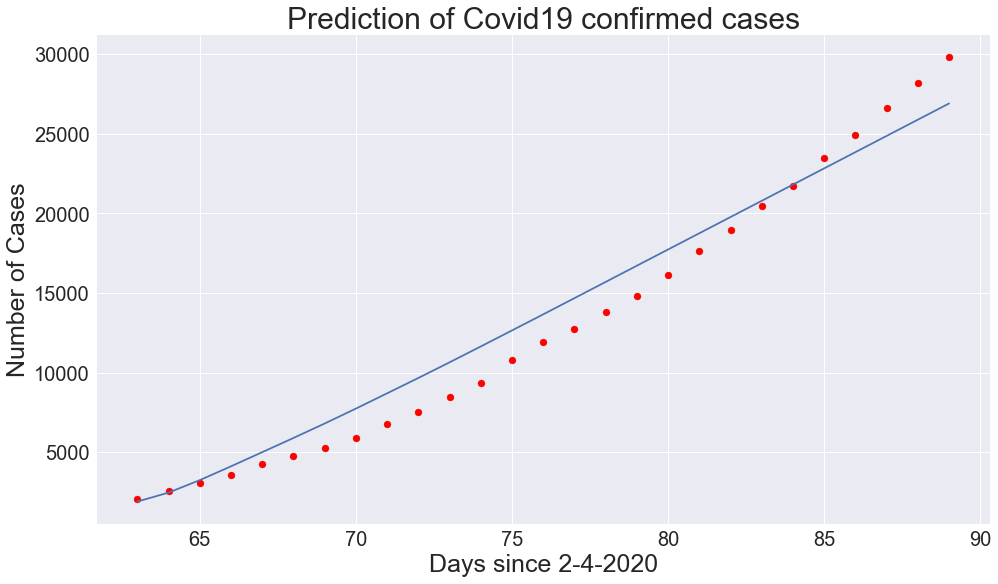

In [13]:
plt.figure(figsize=(16,9))
plt.title('Prediction of Covid19 confirmed cases', size=30)
plt.xlabel('Days since 2-4-2020', size=25)
plt.ylabel('Number of Cases',size=25)
plt.scatter(X_test, y_test, color = 'red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.plot()
plt.plot(X_test, predict)

# Future Prediction:
Predicting the cases for the next 10 days

In [14]:
Future = [[90.],[91.],[92.],[93.],[94.],[95.],[96.],[97.],[98.],[99.]]
Future=np.array(Future,dtype='float')

predict=model.predict(Future)

df2 = pd.DataFrame()

df2['Day'] = Future.flatten()

df2['Prediction'] = predict.flatten()

df2

,Day,Prediction
0,90.0,27921.361328
1,91.0,28940.179688
2,92.0,29959.003906
3,93.0,30977.824219
4,94.0,31996.644531
5,95.0,33015.464844
6,96.0,34034.285156
7,97.0,35053.093750
8,98.0,36071.906250
9,99.0,37090.722656
